In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.sparse as sparse
import scipy.sparse.linalg as linalg
from scipy.stats import norm

In [49]:
def call_price(S,K,r,T,sigma):
    d1=(np.log(S/K)+(r+0.5*sigma**2)*T)/(sigma*np.sqrt(T))
    d2=(np.log(S/K)+(r-0.5*sigma**2)*T)/(sigma*np.sqrt(T))
    c = S*norm.cdf(d1)-K*norm.cdf(d2)*np.exp(-r*T)
    return c
def put_price(S,K,r,T,sigma):
    d1=(np.log(S/K)+(r+0.5*sigma**2)*T)/(sigma*np.sqrt(T))
    d2=(np.log(S/K)+(r-0.5*sigma**2)*T)/(sigma*np.sqrt(T))
    p = K*np.exp(-r*T)*(1-norm.cdf(d2))-S*(1-norm.cdf(d1))
    return p
def X(S,k,t):
    return np.log(S/k)+(r-0.5*sigma**2)*t
def S(X,k,t):
    return k*np.exp(X-(r-0.5*sigma**2)*t)

In [142]:
#Solving p_t = 0.5(Dp)_xx where u,D are supposed to be constant inputs, can be later generalized to functionals
def solve_fpe(m, n, T,sigma, a, b,p_0):
    """
    This function solves a constant coefficient 1D fpe with drag coefficient u and diffusion coefficient D using explicit FTCS method.
    The spatial interval is [a,b] and the time range is [0,T]
    m grids and n steps are used for spatial and time discretizations.
    The funciton returns the end time numerical solution p_cur and the spatial array x.
    """
    D = sigma**2
    x = np.linspace(a, b, m+1)
    delta_x = float(b - a) / m
    delta_t = float(T) / n
    mean = (a + b)/2.0
    t_0 = 1.0 / D
    t =0.0
    p_cur = p_0.copy()
    y_upper = float(max(p_0)+0.01)
    plt.plot(x, p_cur, label='t = '+str(t))
    for j in range(1,n+1):
        
        t = j*delta_t
        p_old = p_cur.copy()
        for i in range(1,m):
            #centered difference
            p_cur[i] = delta_t*D*0.5*(p_old[i-1] - 2*p_old[i] + p_old[i+1])/delta_x**2 + p_old[i]
        p_cur[0] = p_cur[1]
        p_cur[-1] = p_cur[-2]
        if j%(n/10) == 0:
            
            plt.plot(x, p_cur, label='t = '+str(t))
            print "Time "+str(t)+" probability total = "+str(sum(p_cur)*delta_x)
    plt.xlabel("x")
    plt.xlim(a,b)
    plt.ylabel("u(x)")
    plt.ylim(0,y_upper)
    plt.legend(loc='upper left')
    plt.title("FPE with Vol="+str(D)+" in "+str([a,b]))
    plt.show()
   
    return p_cur, x
def solve_fpe_back(m, n, T,sigma, a, b,p_0):
    """
    This function solves a constant coefficient 1D fpe with drag coefficient u and diffusion coefficient D using explicit FTCS method.
    The spatial interval is [a,b] and the time range is [0,T]
    m grids and n steps are used for spatial and time discretizations.
    The funciton returns the end time numerical solution p_cur and the spatial array x.
    """
    D = -sigma**2
    x = np.linspace(a, b, m+1)
    delta_x = float(b - a) / m
    delta_t = float(T) / n
    mean = (a + b)/2.0
    t_0 = 1.0 / D
    t =0.0
    p_cur = p_0.copy()
    plt.plot(x, p_cur, label='t = '+str(t))
    for j in range(1,n+1):
        
        t = j*delta_t
        p_old = p_cur.copy()
        for i in range(1,m):
            #centered difference
            p_cur[i] = delta_t*D*0.5*(p_old[i-1] - 2*p_old[i] + p_old[i+1])/delta_x**2 + p_old[i]
        p_cur[0] = p_cur[1]
        p_cur[-1] = p_cur[-2]
        if j%(n/10) == 0:
            
            plt.plot(x, p_cur, label='t = '+str(t))
            print "Time "+str(t)+" probability total = "+str(sum(p_cur)*delta_x)
    y_upper = float(max(p_cur)+0.01)
    plt.xlabel("x")
    plt.xlim(a,b)
    plt.ylabel("u(x)")
    plt.ylim(0,y_upper)
    plt.legend(loc='upper left')
    plt.title("FPE with Vol="+str(D)+" in "+str([a,b]))
    plt.show()
   
    return p_cur, x
def solve_fpe_back_implicit(m, n, T,sigma, a, b,p_0):
    """
    This function solves a constant coefficient 1D fpe with drag coefficient u and diffusion coefficient D using explicit FTCS method.
    The spatial interval is [a,b] and the time range is [0,T]
    m grids and n steps are used for spatial and time discretizations.
    The funciton returns the end time numerical solution p_cur and the spatial array x.
    """
    D = -sigma**2
    x = np.linspace(a, b, m+1)
    delta_x = float(b - a) / m
    delta_t = float(T) / n
    mean = (a + b)/2.0
    t_0 = 1.0 / D
    t =0.0
    p_cur = p_0.copy()
    y_upper = float(max(p_0)+0.01)
    plt.plot(x, p_cur, label='t = '+str(t))
    plt.ylim((0,2))
    r = D*0.5 * delta_t / (delta_x**2)
    
    for j in range(1,n+1):
        
        t = j*delta_t
        p_old = p_cur.copy()
        for i in range(1,m):
            #centered difference
            p_cur[i] = (delta_t*D*0.5*(p_old[i-1]+ p_old[i+1])/delta_x**2 + p_old[i])/(1+2*r)
        p_cur[0] = p_cur[1]
        p_cur[-1] = p_cur[-2]
        if j%(n/10) == 0:
            
            plt.plot(x, p_cur, label='t = '+str(t))
            print "Time "+str(t)+" probability total = "+str(sum(p_cur)*delta_x)
    plt.xlabel("x")
    plt.xlim(a,b)
    plt.ylabel("u(x)")
    plt.ylim(0,y_upper)
    plt.legend(loc='upper left')
    plt.title("FPE with Vol="+str(D)+" in "+str([a,b]))
    plt.show()
   
    return p_cur, x

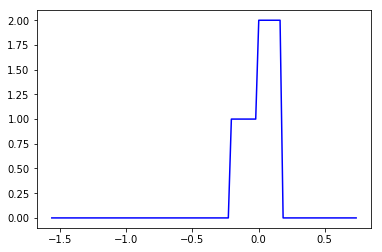

In [165]:
#BS test 1
r = 0.05
T = 1.0
K = 100.0
dK = 20
d = [1.0,1.0,-2.0]
sigma = 0.1
S_a = 20
S_b = 200
m=100
n=50
x_a = X(S_a,K,T)
x_b = X(S_b,K,T)
xx = np.linspace(x_a, x_b, m+1)
x_k = X(K-dK,K,0)
x_k1 = X(K,K,0)
x_k2 = X(K+dK,K,0)
u_0 = []
for x in xx:
    v = 0.0
    if x>=x_k:
        v+=d[0]
    if x>=x_k1:
        v+=d[1]
    if x>=x_k2:
        v+=d[2]
    u_0.append(v)
u_0 = np.array(u_0)
plt.plot(xx,u_0,'b')

Time 0.1 probability total = 0.5756462732485114
Time 0.2 probability total = 0.5756462732485116
Time 0.3 probability total = 0.5756462732485116
Time 0.4 probability total = 0.5756462732485117
Time 0.5 probability total = 0.5756462732485115
Time 0.6 probability total = 0.5756462732485198
Time 0.7 probability total = 0.5756462732493138
Time 0.8 probability total = 0.5756462732674382
Time 0.9 probability total = 0.5756462734496062
Time 1.0 probability total = 0.5756462745268504


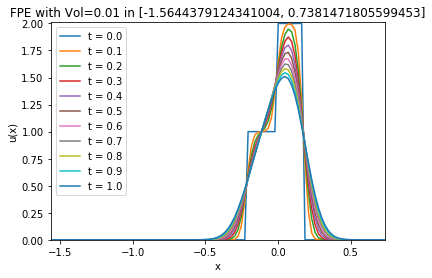

In [166]:
p_t,xx = solve_fpe(m,n,T,sigma,x_a,x_b,u_0)

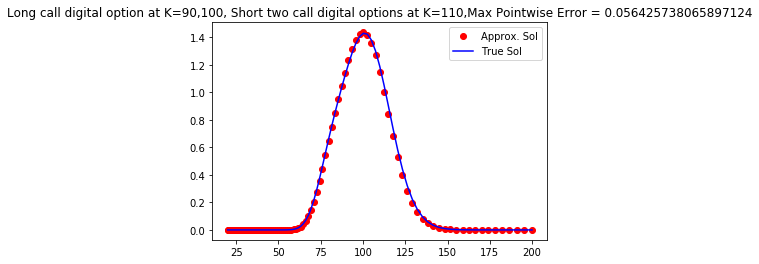

In [167]:
V_t = p_t*np.exp(-r*T)
S_t = np.array([K*np.exp(x-(r-0.5*sigma**2)*T) for x in xx])
true_V = d[0]*np.array([np.exp(-r*T)*norm.cdf((np.log(s/(K-dK))+(r-0.5*sigma**2)*T)/(sigma*np.sqrt(T))) for s in S_t])
true_V+=d[1]*np.array([np.exp(-r*T)*norm.cdf((np.log(s/(K))+(r-0.5*sigma**2)*T)/(sigma*np.sqrt(T))) for s in S_t])
true_V+=d[2]*np.array([np.exp(-r*T)*norm.cdf((np.log(s/(K+dK))+(r-0.5*sigma**2)*T)/(sigma*np.sqrt(T))) for s in S_t])
plt.plot(S_t,V_t,'ro',label='Approx. Sol')
plt.plot(S_t, true_V,'b',label='True Sol')
plt.title('Long call digital option at K=90,100, Short two call digital options at K=110,Max Pointwise Error = '+str(max(abs(true_V-V_t))))
plt.legend()

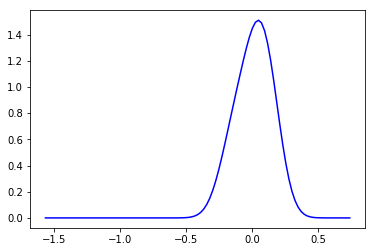

In [168]:
plt.plot(xx,p_t,'b')

Time 0.1 probability total = 0.5756462733284791
Time 0.2 probability total = 0.5756462732440205
Time 0.3 probability total = 0.5756462732496656
Time 0.4 probability total = 0.5756462732478
Time 0.5 probability total = 0.5756462732493957
Time 0.6 probability total = 0.5756462732467776
Time 0.7 probability total = 0.5756462732524673
Time 0.8 probability total = 0.5756462732415033
Time 0.9 probability total = 0.5756462732421816
Time 1.0 probability total = 0.5756462732672579


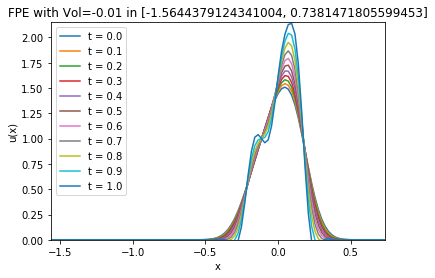

In [179]:
p_0,xx = solve_fpe_back(m,100,T,sigma,x_a,x_b,p_t)

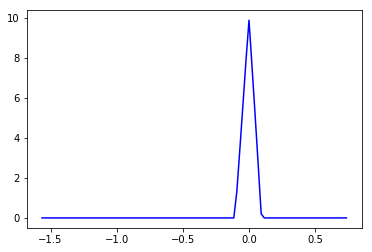

In [180]:
#BS test 2
r = 0.05
T = 1.0
K = 100.0
dK = 10
d = [1.0,-2.0,1.0]
sigma = 0.1
S_a = 20
S_b = 200
m=100
n=1000
x_a = X(S_a,K,T)
x_b = X(S_b,K,T)
xx = np.linspace(x_a, x_b, m+1)
x_k = X(K-dK,K,0)
x_k1 = X(K,K,0)
x_k2 = X(K+dK,K,0)
u_0 = []
for x in xx:
    v = 0.0
    if x>=x_k:
        v+=d[0]*(S(x,K,0)-K+dK)
    if x>=x_k1:
        v+=d[1]*(S(x,K,0)-K)
    if x>=x_k2:
        v+=d[2]*(S(x,K,0)-K-dK)
    u_0.append(v)
u_0 = np.array(u_0)
plt.plot(xx,u_0,'b')

Time 0.1 probability total = 1.0065665176069742
Time 0.2 probability total = 1.006566517606974
Time 0.3 probability total = 1.006566517606974
Time 0.4 probability total = 1.0065665176069738
Time 0.5 probability total = 1.0065665176069742
Time 0.6 probability total = 1.0065665176069887
Time 0.7 probability total = 1.0065665176072474
Time 0.8 probability total = 1.0065665176099747
Time 0.9 probability total = 1.006566517629052
Time 1.0 probability total = 1.006566517726657


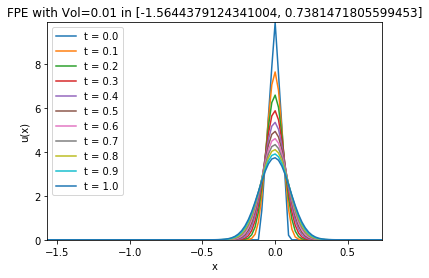

In [181]:
p_t,xx = solve_fpe(m,n,T,sigma,x_a,x_b,u_0)

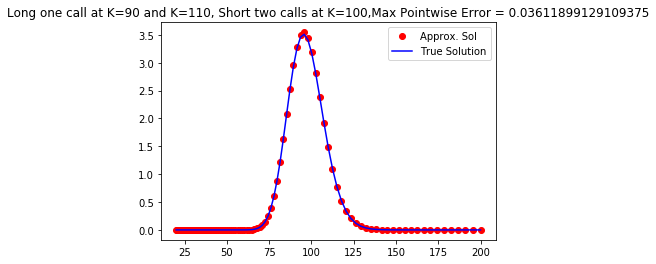

In [182]:
V_t = p_t*np.exp(-r*T)
S_t = np.array([S(x,K,T) for x in xx])
true_V = d[0]*np.array([call_price(s,K-dK,r,T,sigma) for s in S_t])
true_V+=d[1]*np.array([call_price(s,K,r,T,sigma) for s in S_t])
true_V+=d[2]*np.array([call_price(s,K+dK,r,T,sigma) for s in S_t])
plt.plot(S_t,V_t,'ro',label='Approx. Sol')
plt.plot(S_t, true_V,'b',label='True Solution')
plt.title('Long one call at K=90 and K=110, Short two calls at K=100,Max Pointwise Error = '+str(max(abs(true_V-V_t))))
plt.legend()

Time 0.1 probability total = 1.0065665176269816
Time 0.2 probability total = 1.0065665176092107
Time 0.3 probability total = 1.0065665176071095
Time 0.4 probability total = 1.0065665176069767
Time 0.5 probability total = 1.0065665176069738
Time 0.6 probability total = 1.0065665176069751
Time 0.7 probability total = 1.0065665176070762
Time 0.8 probability total = 1.006566517613033
Time 0.9 probability total = 1.006566517938537
Time 1.0 probability total = 1.0065665347517774


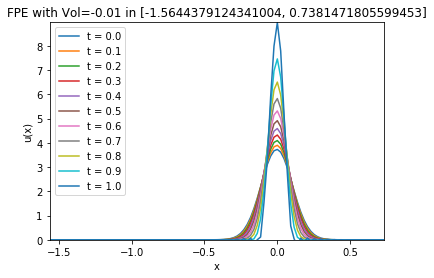

In [187]:
p_0,xx = solve_fpe_back(m,200,T,sigma,x_a,x_b,p_t)

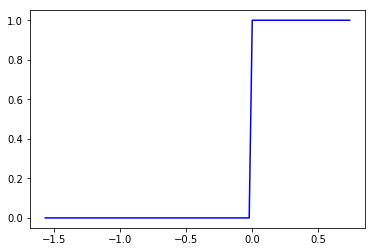

In [188]:
#BS test 2
r = 0.05
T = 1.0
K = 100.0
dK = 50
d = [1.0,0.0]
sigma = 0.1
S_a = 20
S_b = 200
m=100
n=1000
x_a = X(S_a,K,T)
x_b = X(S_b,K,T)
xx = np.linspace(x_a, x_b, m+1)
x_k = X(K,K,0)
x_k1 = X(K+dK,K,0)
u_0 = []
for x in xx:
    v = 0.0
    if x>=x_k:
        v+=d[0]
    if x>=x_k1:
        v+=d[1]
    u_0.append(v)
u_0 = np.array(u_0)
plt.plot(xx,u_0,'b')

Time 0.1 probability total = 0.7598530806880351
Time 0.2 probability total = 0.7598530806880353
Time 0.3 probability total = 0.7598530806880351
Time 0.4 probability total = 0.7598530806880353
Time 0.5 probability total = 0.7598530806880355
Time 0.6 probability total = 0.7598530806880355
Time 0.7 probability total = 0.7598530806880351
Time 0.8 probability total = 0.7598530806880334
Time 0.9 probability total = 0.7598530806880134
Time 1.0 probability total = 0.7598530806878662


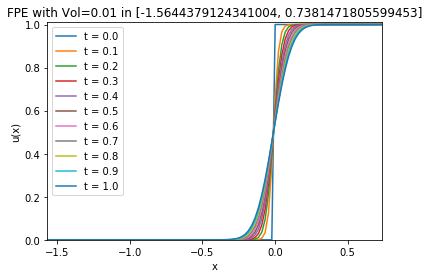

In [189]:
p_t,xx = solve_fpe(m,n,T,sigma,x_a,x_b,u_0)

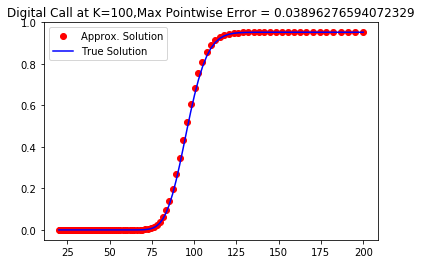

In [190]:
V_t = p_t*np.exp(-r*T)
S_t = np.array([S(x,K,T) for x in xx])
true_V = d[0]*np.array([np.exp(-r*T)*norm.cdf((np.log(s/(K))+(r-0.5*sigma**2)*T)/(sigma*np.sqrt(T))) for s in S_t])
#true_V+=d[1]*np.array([np.exp(-r*T)*norm.cdf((np.log(s/(K+dK))+(r-0.5*sigma**2)*T)/(sigma*np.sqrt(T))) for s in S_t])
plt.plot(S_t,V_t,'ro',label='Approx. Solution')
plt.plot(S_t, true_V,'b',label='True Solution')
plt.title('Digital Call at K=100,Max Pointwise Error = '+str(max(abs(true_V-V_t))))
plt.legend()

Time 0.1 probability total = 0.7598530806880193
Time 0.2 probability total = 0.7598530806880344
Time 0.3 probability total = 0.7598530806880361
Time 0.4 probability total = 0.7598530806880688
Time 0.5 probability total = 0.7598530806889882
Time 0.6 probability total = 0.7598530807117785
Time 0.7 probability total = 0.7598530812503178
Time 0.8 probability total = 0.7598530936736461
Time 0.9 probability total = 0.7598533763361417
Time 1.0 probability total = 0.7598597502697719


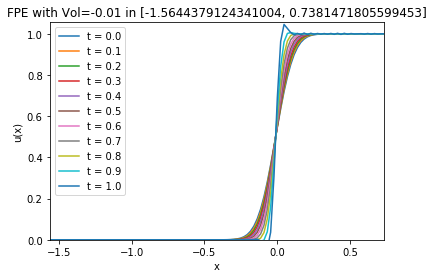

In [194]:
p_0,xx = solve_fpe_back(m,100,T,sigma,x_a,x_b,p_t)